In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path

In [3]:
path = Path.cwd().parent / 'data' / 'base'

In [4]:
bids = []
offers = []
pns = []

for d in tqdm(os.listdir(path)):

    try:
        bids.append(
            pd.read_csv(path / d / 'bids.csv', index_col=[0,1]
            )
        )
    except FileNotFoundError:
        pass

    try:
        offers.append(
            pd.read_csv(path / d / 'offers.csv', index_col=[0,1]
            )
        )
    except FileNotFoundError:
        pass

    try:
        pns.append(
            pd.read_csv(path / d / 'physical_notifications.csv', index_col=0
            )
        )
    except FileNotFoundError:
        pass

offers = pd.concat(offers)
bids = pd.concat(bids)
pns = pd.concat(pns)


100%|██████████| 851/851 [01:34<00:00,  9.02it/s]


In [5]:
onwind_farms = [
    'TMNCW-1',
    'BLARW-1',
    'BRDUW-1',
    'GRGRW-1',
    'CREAW-1',
    'CUMHW-1',
    'DALQW-1',
    'FAARW-1',
    'FAARW-2',
    'GLNKW-1',
    'KENNW-1',
    'KLGLW-1',
    'KYPEW-1',
    'SAKNW-1',
    'PNYCW-1',
    'SOKYW-1',
    ]

offwind_farms = [
    'BLLA-1',
    'BLLA-2',
]

carrier_mapper = {
    'offwind': ['offwind', 'floating wind'],
    'onwind': ['onwind'],
    'biomass': ['biomass'],
    'fossil': ['gas', 'gas-fired', 'gas turbine', 'CCGT', 'powerstation', 'CHP', 'coal'],
    'demand_flex': ['supply', 'natural gas processing'],
    'PHS': ['PHS'],
    'battery': ['battery', ''],
    'solar': ['solar', 'solar power station', 'PV'],
    'nuclear': ['nuclear'],
    'hydro': ['cascade', 'dam', 'hydro', 'hydro-scheme'],
    'load': ['submarine power cable', 'steel mill'],
    'interconnector': ['interconnector', 'HVDC submarine'],
}

In [146]:
# bmus = pd.read_csv(Path.cwd().parent / 'data' / 'bmunits_loc.csv', index_col=0).dropna()

In [6]:
bmus = pd.read_csv(Path.cwd().parent / 'data' / 'temp_located_bmus.csv', index_col=0).dropna()

bmus.loc[bmus.carrier == 'supply']
# bmus = bmus.loc[bmus['lon'] != 0.]

bmus.loc[onwind_farms, 'carrier'] = 'onwind'
bmus.loc[offwind_farms, 'carrier'] = 'offwind'

for clean_name, old_carriers in carrier_mapper.items():
    bmus.loc[bmus['carrier'].isin(old_carriers), 'carrier'] = clean_name

In [7]:
# bmus = pd.read_csv(Path.cwd().parent / 'data' / 'bmunits_loc.csv', index_col=0).dropna()

bmus.loc[(bmus.carrier == 'battery') & (bmus['lon'] == 0.)].shape
missing_batteries = bmus.loc[(bmus.carrier == 'battery') & (bmus['lon'] == 0.)].index


In [13]:
pns.loc[:, missing_batteries].abs().sum().sort_values(ascending=False).iloc[30:]

NationalGridBmUnit
JAMBB-1      50482.366667
AG-HLIM02    48901.766667
AG-GEDF01    44691.433333
AG-GEDF02    44581.116667
ZEN02A       42333.300000
BHOLB-1      31219.000000
BROAB-1      30761.566667
FFSE01       28965.950000
NEWTB-1      28883.166667
AG-JSTK02    24975.983333
AG-HLIM01    20523.950000
AG-HEL0CP    15646.166667
CRSSB-1      14882.733333
WBURB-43     14114.200000
WBURB-41     13957.900000
AG-HEL0DN    13541.250000
ARNKB-2      10794.016667
PNYCB-1       6186.900000
RSCRB-1          0.000000
dtype: float64

In [16]:
def search_similar(name, df):
    return df.loc[df.index.str.contains(name, case=False)]

search_similar('WBURB', bmus)

,lat,lon,capacity,carrier
NationalGridBmUnit,,,,
WBURB-1,53.363665,-0.53833,1332.0,fossil
WBURB-2,53.363665,-0.53833,1332.0,fossil
WBURB-3,53.363665,-0.53833,1332.0,fossil
WBURB-41,0.000000,0.00000,49.0,battery
WBURB-43,0.000000,0.00000,49.0,battery


In [17]:
manual_battery_locs = {
    'RSCRB-1': (None, None),
    'PNYCB-1': (51.709, -3.564),
    'ARNKB-2': (51.484, 0.344),
    'AG-HEL0DN': (56.166, -3.204),
    'WBURB-41': (53.364, -0.538),
    'WBURB-43': (53.364, -0.538),
    'CRSSB-1': (53.481, -2.959),
    'AG-HEL0CP': (56.324, -2.995),
    'AG-HLIM01': (56.941, -2.255),
    'AG-JSTK02': (51.231, -0.334),
    'NEWTB-1': (53.138, -1.327),
    'FFSE01': (55.016, -1.473),
    'BROAB-1': (51.413, 0.33),
    'BHOLB-1': (50.721, -1.998),
    'ZEN02A': (52.07, 0.591),
    'AG-GEDF01': (53.197, -2.254),
    'AG-GEDF02': (53.197, -2.254),
    'AG-HLIM02': (50.852, -1.194),
    'JAMBB-1': (56.341, -3.294),
    'BFSE01': (52.585, -1.22),
    'DOLLB-1': (51.6, 0.56),
    'AG-HLIM03': (51.616, -1.99),
    'AG-MSTK01': (53.791, -0.405),
    'PILLB-1': (53.796, -0.407),
    'PILLB-2': (53.796, -0.407),
    'SKELB-1': (53.553, -2.775),
    'BWURB-1': (52.279, 0.316),
    'AG-HEL00G': (53.787, -2.643),
    'AG-HLIM04': (51.598, -1.494),
    'AG-HLIM01': (51.598, -1.494),
    'KEMB-1': (51.364, 0.737),
    'AG-MFLX02': (53.398, -1.247),
    'BUSTB-1': (52.549, -2.02),
    'AG-HSTK02': (51.615, -1.962),
    'COVNB-1': (52.409, -1.508),
    'AG-HSTK01': (51.615, -1.962),
    'CLAYB-1': (51.552, 0.298),
    'CLAYB-2': (51.552, 0.298),
    'AG-ASTK05': (52.197, 0.126),
    'TOLLB-1': (51.735, -0.245),
    'ILMEB-1': (51.741, -0.892),
    'ARNKB-1': (52.61, -2.),
    'LITRB-1': (56.104, -3.33),
    'THMRB-1': (51.766, -0.894),
    'CUPAB-1': (56.316, -3.013),
    'AG-PFLX01': (56.412, -3.423),
    'AG-ZEN03J': (51.302, 0.477),
    'NFSE02': (55.907, -3.588),
    'FARNB-1': (51.21, -0.791),
    'AG-LLIM01': (51.516, -2.652),
}

100


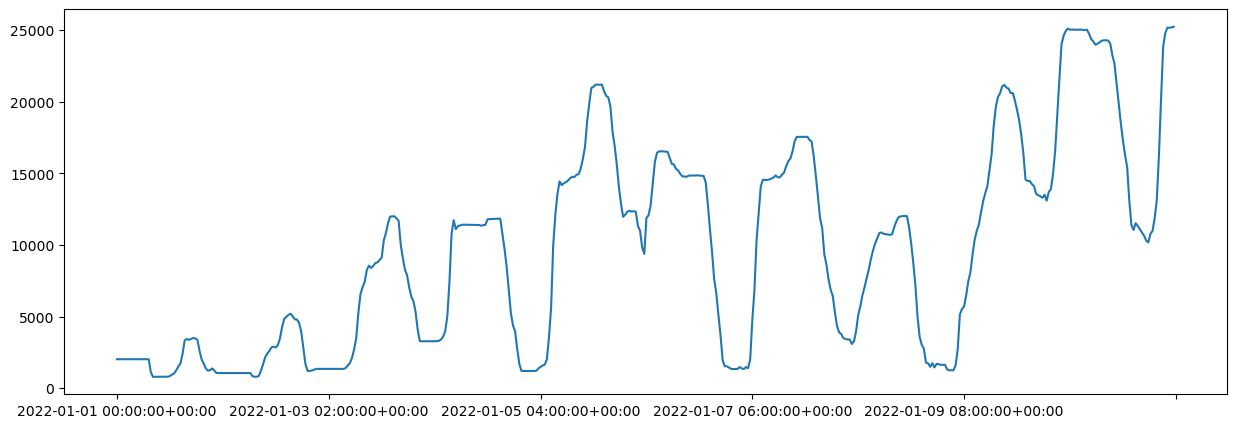

In [124]:
import matplotlib.pyplot as plt

carrier = 'fossil'

b = bmus.loc[bmus.carrier == carrier].index
print(len(b))

fig, ax = plt.subplots(figsize=(15, 5))

pns.loc[:,b].sum(axis=1).iloc[:500].plot(ax=ax)
# pns.loc[:,b].iloc[5000:10000].plot(ax=ax)

plt.show()

In [93]:
import geopandas as gpd

countries = gpd.read_file('country_shapes.geojson').set_index('cntry_name')

In [104]:
offwind.index

Index(['BLLA-1', 'BLLA-2'], dtype='object', name='NationalGridBmUnit')

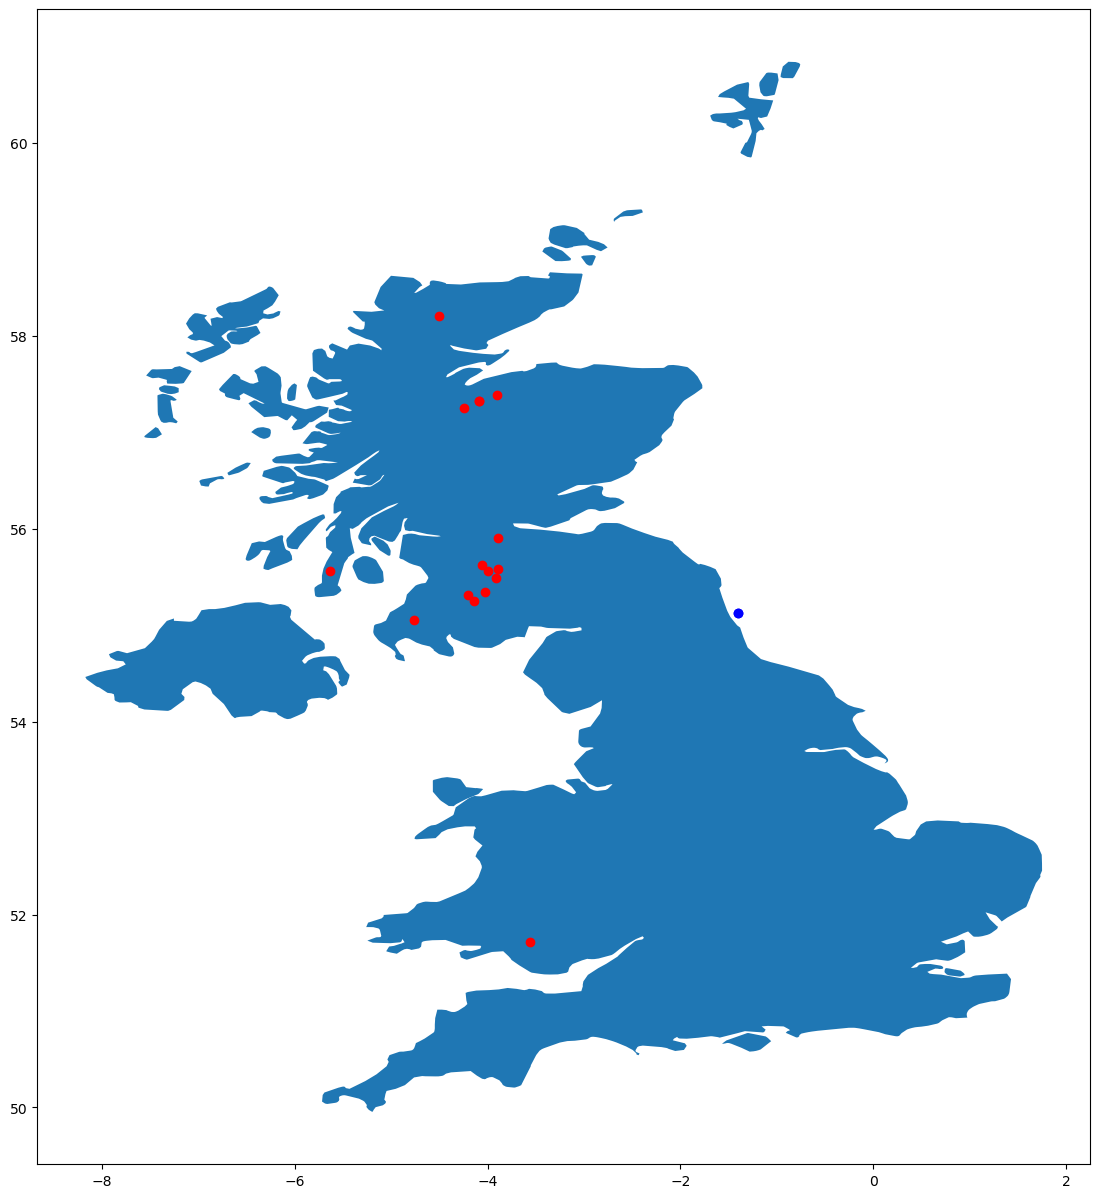

In [102]:
# countries.loc[['United Kingdom']].plot()
wind = bmus.loc[bmus.carrier == 'wind']
wind = gpd.GeoDataFrame(wind, geometry=gpd.points_from_xy(wind.lon, wind.lat))

onwind = wind.loc[wind['geometry'].within(countries.loc['United Kingdom'].geometry)]
offwind = wind.loc[~wind['geometry'].within(countries.loc['United Kingdom'].geometry)]

fig, ax = plt.subplots(figsize=(15, 15))

countries.loc[['United Kingdom']].plot(ax=ax)
onwind.plot(ax=ax, color='red')
offwind.plot(ax=ax, color='blue')
plt.show()

In [23]:
bmus.loc[bmus.carrier == 'battery'].head(30)

,lat,lon,capacity,carrier
NationalGridBmUnit,,,,
BFSE01,0.000000,0.000000,50.0,battery
RSCRB-1,0.000000,0.000000,0.0,battery
AG-HLIM01,0.000000,0.000000,60.0,battery
AG-HLIM02,0.000000,0.000000,60.0,battery
AG-HLIM03,0.000000,0.000000,100.0,battery
AG-HLIM04,0.000000,0.000000,100.0,battery
AG-MFLX02,0.000000,0.000000,50.0,battery
AG-PFLX01,0.000000,0.000000,49.9,battery
ARNKB-2,0.000000,0.000000,49.9,battery


In [10]:
pd.concat(pns)

NameError: name 'pns' is not defined